## Regression

Model purpose: given a job description, predict a score for the job description.

### Download and loading of dataset

In [1]:
from codecs import ignore_errors

import kagglehub
import os
import pandas as pd
# Download latest version to the specified directory
path = kagglehub.dataset_download("arshkon/linkedin-job-postings")

#path = "/home/leon/.cache/kagglehub/datasets/arshkon/linkedin-job-postings/versions/13"

print(f"Path to dataset files: {path}")
print(f"List of files in the dataset: {os.listdir(path)}")

/Users/yacinebenihaddadene/Documents/School/S8/NLP1/project/NLP_Linkedin_offers/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/yacinebenihaddadene/.cache/kagglehub/datasets/arshkon/linkedin-job-postings/versions/13
List of files in the dataset: ['postings.csv', 'mappings', 'jobs', 'companies']


**Drop indexes with NaN values**

In [2]:
postings_path = path + "/postings.csv"
postings_df = pd.read_csv(postings_path, usecols=["job_id", "company_name", "company_id", "title", "location", "description", "max_salary", "views"])

### Data analysis and preprocessing

In [21]:
# Quick overview of the dataset
print(f"Number of rows: {postings_df.shape[0]}")
print(f"Number of columns: {postings_df.shape[1]}")

# Display the first few rows of the DataFrame
# print(postings_df.head())
# print(postings_df["description"][0])

# print number of unique values for views column
unique_views = postings_df["views"].nunique()
print(f"Number of unique values in the 'views' column: {unique_views}")

not_nan = postings_df["views"].notna()
print(f"Number of non-NaN values in the 'views' column: {not_nan.sum()}")



# Set zip_code column type to int
# postings_df["zip_code"] = postings_df["zip_code"].astype("Int64", errors="raise")


# Count rows where any of these columns is NaN
rows_with_any_nan = postings_df[["description", "views"]].isna().any(axis=1).sum()
print(f"Rows with at least one NaN value: {rows_with_any_nan}")

# drop rows with NaN values in specific columns
print(f"Number of rows before dropping NaN values: {postings_df.shape[0]}")
postings_df.dropna(subset=["description", "views"], inplace=True)
print(f"Number of rows after dropping NaN values: {postings_df.shape[0]}")

Number of rows: 123849
Number of columns: 8
Number of unique values in the 'views' column: 684
Number of non-NaN values in the 'views' column: 122160
Rows with at least one NaN value: 1696
Number of rows before dropping NaN values: 123849
Number of rows after dropping NaN values: 122153


**Cleaning the descriptions of unwanted characters such as emojis etc**

In [22]:
import re

# Nettoyage de base
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'\d{10,}', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s.,!?]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the clean_text function and ASSIGN the result back
postings_df['description'] = postings_df['description'].apply(lambda x: clean_text(x))
postings_df

,job_id,company_name,title,description,max_salary,location,company_id,views
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,job descriptiona leading real estate firm in n...,20.0,"Princeton, NJ",2774458.0,20.0
1,1829192,NaN,Mental Health Therapist/Counselor,"at aspen therapy and wellness , we are committ...",50.0,"Fort Collins, CO",NaN,1.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,the national exemplar is accepting application...,65000.0,"Cincinnati, OH",64896719.0,8.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,senior associate attorney elder law trusts and...,175000.0,"New Hyde Park, NY",766262.0,16.0
4,35982263,NaN,Service Technician,looking for hvac service tech with experience ...,80000.0,"Burlington, IA",NaN,3.0
...,...,...,...,...,...,...,...,...
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,our walnut creek office is currently seeking a...,195000.0,"Walnut Creek, CA",56120.0,1.0
123845,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",about pinterest millions of people across the ...,NaN,United States,1124131.0,3.0
123846,3906267131,EPS Learning,"Account Executive, Oregon/Washington",company overview eps learning is a leading k12...,NaN,"Spokane, WA",90552133.0,3.0
123847,3906267195,Trelleborg Applied Technologies,Business Development Manager,the business development manager is a hunter t...,NaN,"Texas, United States",2793699.0,4.0


------------------------------------------

In [2]:
postings_path = path + "/postings.csv"
postings = pd.read_csv(postings_path)

In [3]:
max_salary_df_reg = postings[postings["max_salary"].notna()]
med_salary_df_reg = postings[postings["med_salary"].notna()]
min_salary_df_reg = postings[postings["min_salary"].notna()]
normalized_salary_df_reg = postings[postings["normalized_salary"].notna()]

In [7]:
normalized_salary_df_reg[normalized_salary_df_reg["pay_period"] == "BIWEEKLY"]

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
36894,3895598632,Sherwin-Williams,Assistant Manager Trainee,Job Description\n\nThe Sherwin-Williams Assist...,2057.0,BIWEEKLY,"Sioux Falls, SD",165944.0,7.0,NaN,...,NaN,1.712897e+12,ejhp.fa.us6.oraclecloud.com,0,FULL_TIME,USD,BASE_SALARY,53482.0,57103.0,46099.0
86850,3904386637,Sherwin-Williams,Assistant Manager Trainee,Job Description\n\nThe Sherwin-Williams Assist...,2134.0,BIWEEKLY,"Orange, CA",165944.0,7.0,NaN,...,NaN,1.713393e+12,ejhp.fa.us6.oraclecloud.com,0,FULL_TIME,USD,BASE_SALARY,55484.0,92862.0,NaN
86985,3904387609,Sherwin-Williams,"Store Sales Representative - Chesterfield, VA",Job Description\n\nThis position is required t...,66976.0,BIWEEKLY,"Chesterfield, VA",165944.0,7.0,NaN,...,NaN,1.713393e+12,ejhp.fa.us6.oraclecloud.com,0,FULL_TIME,USD,BASE_SALARY,1572805.0,23832.0,51041.0
87136,3904388204,Sherwin-Williams,R&D Scientific Programmer,Job Description\n\nThe Scientific Programmer p...,89965.0,BIWEEKLY,"Cleveland, OH",165944.0,31.0,NaN,...,NaN,1.713393e+12,ejhp.fa.us6.oraclecloud.com,0,FULL_TIME,USD,BASE_SALARY,2096744.0,44102.0,39035.0
99157,3904991870,Sherwin-Williams,"Sales Representative, Residential Repaint",Job Description\n\nSales Representatives initi...,87660.0,BIWEEKLY,"Waltham, MA",165944.0,4.0,NaN,...,NaN,1.713459e+12,ejhp.fa.us6.oraclecloud.com,0,FULL_TIME,USD,BASE_SALARY,2043028.0,2451.0,NaN
99442,3904995353,Sherwin-Williams,"Sales Representative, Residential Repaint",Job Description\n\nSales Representatives initi...,3366.0,BIWEEKLY,"Hammonton, NJ",165944.0,4.0,NaN,...,NaN,1.713459e+12,ejhp.fa.us6.oraclecloud.com,0,FULL_TIME,USD,BASE_SALARY,72943.0,8037.0,34001.0
99498,3904996213,Sherwin-Williams,"Sales Representative, Residential Repaint",Job Description\n\nSales Representatives initi...,81434.0,BIWEEKLY,"Dedham, MA",165944.0,4.0,NaN,...,NaN,1.713459e+12,ejhp.fa.us6.oraclecloud.com,0,FULL_TIME,USD,BASE_SALARY,1897389.0,2026.0,25021.0
107469,3905333190,Sherwin-Williams,"Store Sales Representative - Cleveland, OH",Job Description\n\nThis position is required t...,66976.0,BIWEEKLY,"Cleveland, OH",165944.0,4.0,NaN,...,NaN,1.713480e+12,ejhp.fa.us6.oraclecloud.com,0,FULL_TIME,USD,BASE_SALARY,1572805.0,44102.0,39035.0
122228,3906252426,Sherwin-Williams,"Sales Representative, Residential Repaint, (Bi...",Job Description\n\nSales Representatives initi...,81459.0,BIWEEKLY,"Pinole, CA",165944.0,4.0,NaN,...,NaN,1.713566e+12,ejhp.fa.us6.oraclecloud.com,0,FULL_TIME,USD,BASE_SALARY,1873274.0,94564.0,6013.0


In [4]:
max_salary_df_reg.head(10)

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0
5,91700727,Downtown Raleigh Alliance,Economic Development and Planning Intern,Job summary:The Economic Development & Plannin...,20.0,HOURLY,"Raleigh, NC",1481176.0,9.0,NaN,...,NaN,1.713456e+12,NaN,0,INTERNSHIP,USD,BASE_SALARY,35360.0,27601.0,37183.0
6,103254301,Raw Cereal,Producer,Company DescriptionRaw Cereal is a creative de...,300000.0,YEARLY,United States,81942316.0,7.0,NaN,...,NaN,1.712861e+12,NaN,0,CONTRACT,USD,BASE_SALARY,180000.0,NaN,NaN
7,112576855,NaN,Building Engineer,Summary: Due to the pending retirement of our ...,120000.0,YEARLY,"San Francisco, CA",NaN,2.0,NaN,...,NaN,1.712443e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,105000.0,94101.0,6075.0
17,103860943,NaN,Customer Service / Reservationist,Sentinel Limousine of East Providence RI is a ...,19.0,HOURLY,"Providence, RI",NaN,3.0,NaN,...,NaN,1.713532e+12,NaN,0,PART_TIME,USD,BASE_SALARY,38480.0,2903.0,44007.0
28,227832999,NaN,General Laborer,Looking for a General Laborer for our real est...,24.0,HOURLY,"Erie, PA",NaN,3.0,NaN,...,NaN,1.713280e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,43680.0,16501.0,42049.0


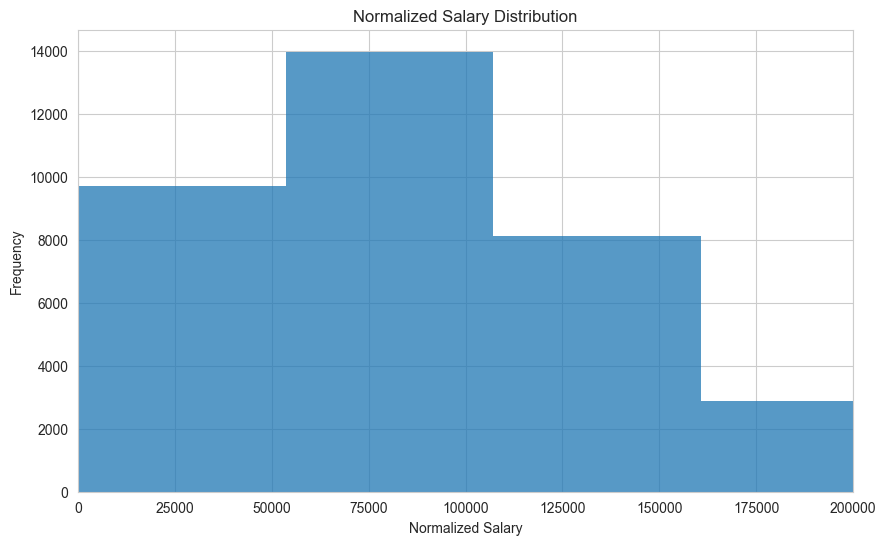

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


#plot normalized salary distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=normalized_salary_df_reg, x="normalized_salary", bins=10000,)
plt.title("Normalized Salary Distribution")
plt.xlabel("Normalized Salary")
plt.ylabel("Frequency")
plt.xlim(0, 200000)
# plt.ylim(0, 10000)
plt.show()

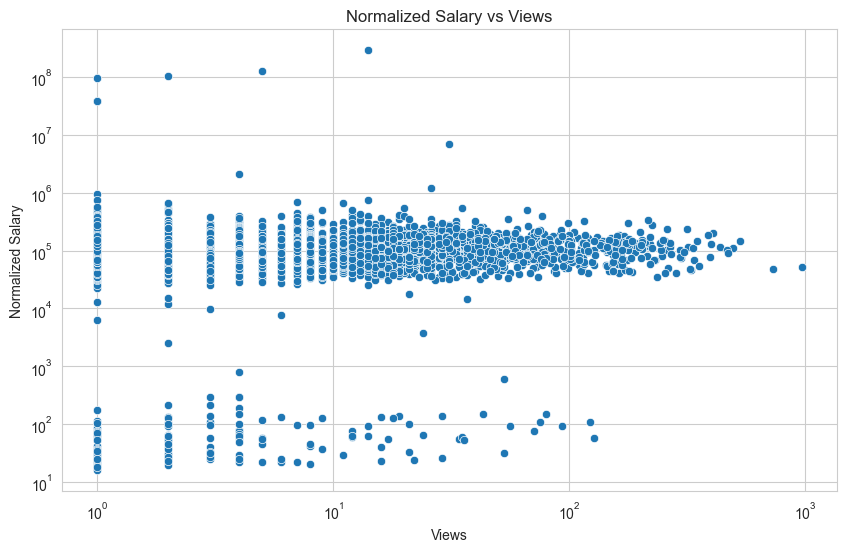

In [82]:
#plot normalized salary in function of views:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=normalized_salary_df_reg, x="applies", y="normalized_salary")
plt.title("Normalized Salary vs Views")
plt.xlabel("Views")
plt.ylabel("Normalized Salary")

plt.xscale('log')
plt.yscale('log')

#plt.xlim(0, 200000)
#plt.ylim(0, 10000)
plt.show()

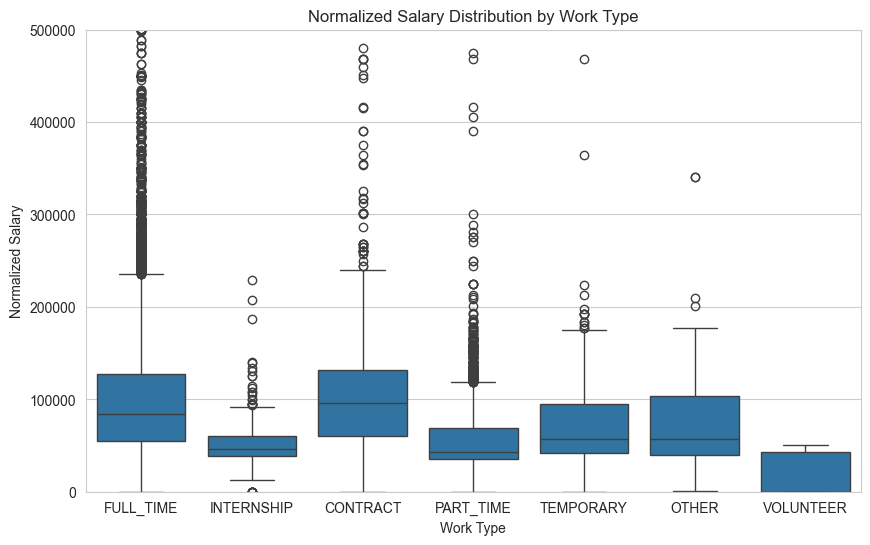

In [8]:
#plot normalized salary in function of work type:
plt.figure(figsize=(10, 6))
sns.boxplot(data=normalized_salary_df_reg, x="work_type", y="normalized_salary")
plt.title("Normalized Salary Distribution by Work Type")
plt.xlabel("Work Type")
plt.ylabel("Normalized Salary")

plt.ylim(0, 500000)
plt.show()


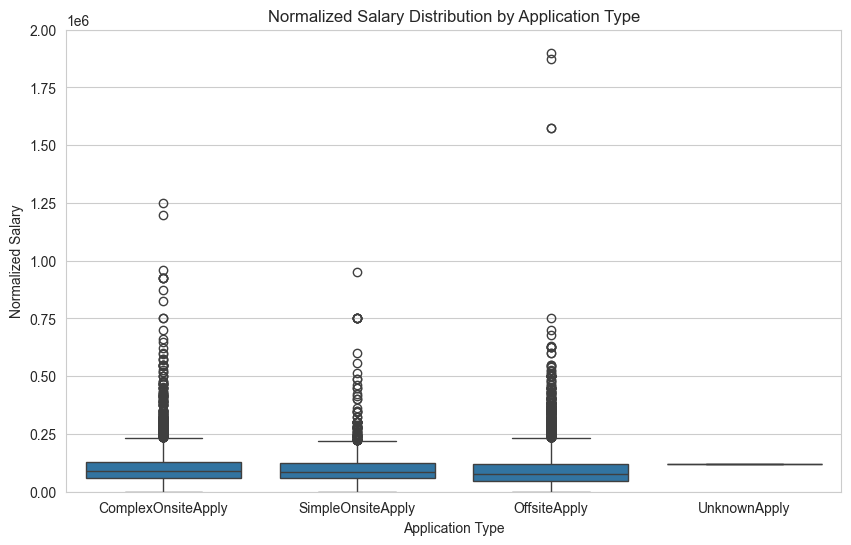

In [9]:
#plot normalized salary in function of application type:
plt.figure(figsize=(10, 6))
sns.boxplot(data=normalized_salary_df_reg, x="application_type", y="normalized_salary")
plt.title("Normalized Salary Distribution by Application Type")
plt.xlabel("Application Type")
plt.ylabel("Normalized Salary")
plt.ylim(0, 2000000)

plt.show()

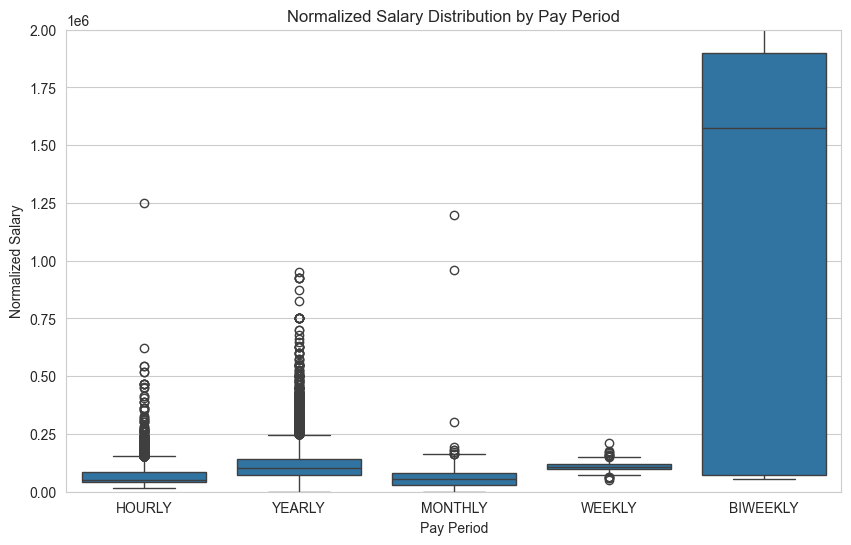

In [10]:
# plot normalized salary in function of pay_period:
plt.figure(figsize=(10, 6))
sns.boxplot(data=normalized_salary_df_reg, x="pay_period", y="normalized_salary")
plt.title("Normalized Salary Distribution by Pay Period")
plt.xlabel("Pay Period")
plt.ylabel("Normalized Salary")
plt.ylim(0, 2000000)
plt.show()

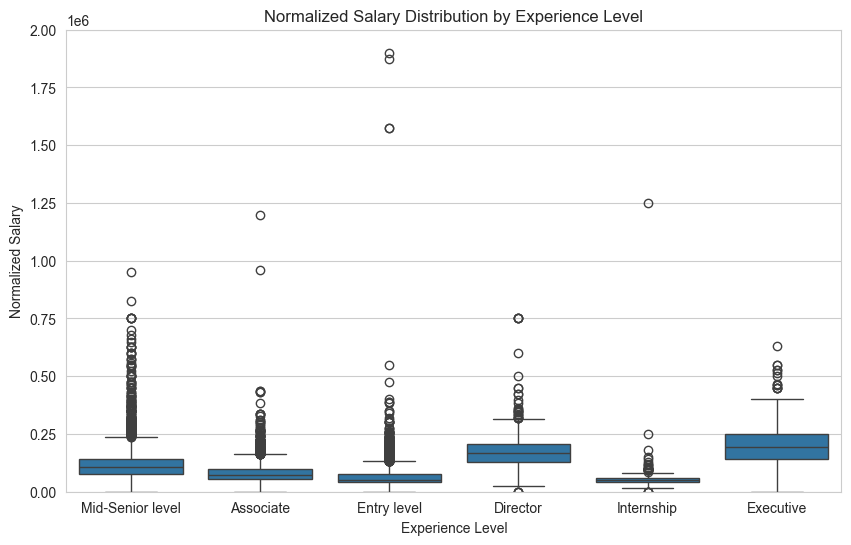

formatted_experience_level
Mid-Senior level    12909
Entry level          9126
Associate            3891
Director             1268
Executive             382
Internship            378
Name: count, dtype: int64
 Proportion of NaN values: 22.51%


In [112]:
# plot normalized salary in function of formatted_experience_level
plt.figure(figsize=(10, 6))
sns.boxplot(data=normalized_salary_df_reg.dropna(subset=["formatted_experience_level", "normalized_salary"]), x="formatted_experience_level", y="normalized_salary")
plt.title("Normalized Salary Distribution by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Normalized Salary")
plt.ylim(0, 2000000)
plt.show()

#print distribution of formatted_experience_level, including NaN values proportion
print(normalized_salary_df_reg["formatted_experience_level"].value_counts())
print(f" Proportion of NaN values: {normalized_salary_df_reg['formatted_experience_level'].isna().sum() / len(normalized_salary_df_reg) * 100:.2f}%")


In [6]:
normalized_salary_df_reg[normalized_salary_df_reg["normalized_salary"] > 200000]

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
188,3606129051,Health Alliance Solutions,Primary Care Leader Needed,Company DescriptionHealth Alliance Solutions i...,297000.0,YEARLY,"Fresno, CA",4807270.0,3.0,NaN,...,NaN,1.713460e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,286000.0,93650.0,6019.0
202,3635916819,Veritas Physician Management,Medical Consultant,Veritas Physician Management Seeks Medicolegal...,NaN,HOURLY,"Brooklyn, NY",88274376.0,4.0,300.0,...,NaN,1.713477e+12,NaN,0,CONTRACT,USD,BASE_SALARY,624000.0,11201.0,36047.0
321,3778036844,POOLESVILLE FAMILY PRACTICE,Family Physician,Get off the RVU treadmill. See 12-15 patients ...,250000.0,YEARLY,"Poolesville, MD",15887330.0,2.0,NaN,...,NaN,1.712404e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,225000.0,20837.0,24031.0
338,3787279047,The Moorhead Team,Real Estate Sales Agent,Company DescriptionThe Moorhead Team is focuse...,400000.0,YEARLY,"Austin, Texas Metropolitan Area",51694480.0,2.0,NaN,...,NaN,1.712863e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,240000.0,NaN,NaN
369,3802026770,"Sudden Wealth Protection Law, PLC",Hiring a Contract Lawyer with Probate Experience,We are a dynamic law firm specializing in prob...,180.0,HOURLY,"Phoenix, AZ",2804734.0,14.0,NaN,...,NaN,1.713453e+12,NaN,0,CONTRACT,USD,BASE_SALARY,317200.0,85003.0,4013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123402,3906258592,Cisco,Senior Verification Technical Leader,Who We Are\n\nThe Common Hardware Group (CHG) ...,266000.0,YEARLY,"San Jose, CA",1063.0,2.0,NaN,...,NaN,1.713568e+12,jobs.cisco.com,0,FULL_TIME,USD,BASE_SALARY,225000.0,95101.0,6085.0
123411,3906258663,MUSC Health,MUSC Health Regional CRNA Director,Job Description Summary\n\nThe MUSC Health Reg...,NaN,YEARLY,"Charleston, SC",51586544.0,4.0,250000.0,...,NaN,1.713569e+12,musc.career-pages.com,0,FULL_TIME,USD,BASE_SALARY,250000.0,29401.0,45019.0
123524,3906259290,Affirm,"Group Product Manager, Card Issuing Platform",Affirm is reinventing credit to make it more h...,333400.0,YEARLY,"St Louis, MO",2963249.0,3.0,NaN,...,NaN,1.713568e+12,boards.greenhouse.io,0,FULL_TIME,USD,BASE_SALARY,266700.0,63367.0,29183.0
123600,3906260032,Yahoo,Principal Technical Program Manager,Yahoo Sports connects fans to the sports and f...,283750.0,YEARLY,United States,1288.0,4.0,NaN,...,NaN,1.713568e+12,ouryahoo.wd5.myworkdayjobs.com,0,FULL_TIME,USD,BASE_SALARY,209937.5,NaN,NaN


In [7]:
normalized_salary_df_reg[normalized_salary_df_reg["normalized_salary"] < 200000]

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123837,3906265414,"TalentBurst, an Inc 5000 company",Contract Administrator,"Position: Clinical Contracts Analyst, Req#: 63...",45.0,HOURLY,"Irvine, CA",122451.0,1.0,NaN,...,NaN,1.713573e+12,NaN,0,CONTRACT,USD,BASE_SALARY,83200.0,92602.0,NaN
123839,3906266165,Athena Recruiting,Catering Event Manager,This role handles all the onsite catering and ...,65000.0,YEARLY,Greater Indianapolis,3056329.0,3.0,NaN,...,NaN,1.713571e+12,NaN,0,PART_TIME,USD,BASE_SALARY,57500.0,NaN,NaN
123843,3906266272,"TalentBurst, an Inc 5000 company",Quality Engineer,Position: Quality Engineer I (Complaint Invest...,50.0,HOURLY,"Irvine, CA",122451.0,1.0,NaN,...,NaN,1.713572e+12,NaN,0,CONTRACT,USD,BASE_SALARY,83200.0,92602.0,NaN
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,1.0,NaN,...,NaN,1.713571e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,94595.0,6013.0


In [8]:
normalized_salary_df_reg.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'normalized_salary', 'zip_code', 'fips'],
      dtype='object')

In [37]:
postings["normalized_salary"].unique()

array([ 38480.,  83200.,  55000., ..., 159200., 210850., 177375.],
      shape=(7267,))

In [38]:
postings["normalized_salary"].isna().sum()

np.int64(87776)

In [34]:
postings["pay_period"].value_counts()

pay_period
YEARLY      20628
HOURLY      14741
MONTHLY       518
WEEKLY        177
BIWEEKLY        9
Name: count, dtype: int64

In [24]:
108603 + 15246 == len(postings)

True

In [42]:
postings[~postings["normalized_salary"].isna()]

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123837,3906265414,"TalentBurst, an Inc 5000 company",Contract Administrator,"Position: Clinical Contracts Analyst, Req#: 63...",45.0,HOURLY,"Irvine, CA",122451.0,1.0,NaN,...,NaN,1.713573e+12,NaN,0,CONTRACT,USD,BASE_SALARY,83200.0,92602.0,NaN
123839,3906266165,Athena Recruiting,Catering Event Manager,This role handles all the onsite catering and ...,65000.0,YEARLY,Greater Indianapolis,3056329.0,3.0,NaN,...,NaN,1.713571e+12,NaN,0,PART_TIME,USD,BASE_SALARY,57500.0,NaN,NaN
123843,3906266272,"TalentBurst, an Inc 5000 company",Quality Engineer,Position: Quality Engineer I (Complaint Invest...,50.0,HOURLY,"Irvine, CA",122451.0,1.0,NaN,...,NaN,1.713572e+12,NaN,0,CONTRACT,USD,BASE_SALARY,83200.0,92602.0,NaN
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,1.0,NaN,...,NaN,1.713571e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,94595.0,6013.0


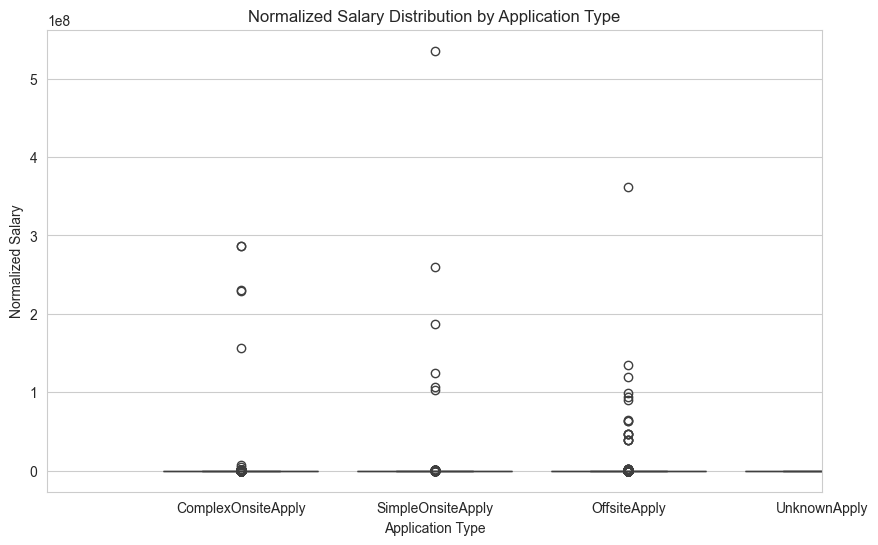

In [28]:
# display distribution of normalized salary in function of application type:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the figure size
plt.figure(figsize=(10, 6))
# Create a boxplot
sns.boxplot(data=postings, x="application_type", y="normalized_salary")
# Set the title and labels
plt.title("Normalized Salary Distribution by Application Type")
plt.xlabel("Application Type")
plt.ylabel("Normalized Salary")
# Set the x-axis limits
plt.xlim(-1, 3)
# Show the plot
plt.show()

In [35]:
len(postings)

123849

In [36]:
len(postings.dropna())

0

In [2]:
import data_transformation as dt

In [3]:
postings_new = dt.load_data(path + "/postings.csv")

In [4]:
postings_new["company_name"] = postings_new["company_name"].fillna("")
postings_new["title"] = postings_new["title"].fillna("")
postings_new["description"] = postings_new["description"].fillna("")

postings_new.dropna(subset=["pay_period", "work_type"], inplace=True)

In [5]:
postings_new.head(10)

,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,min_salary,applies,remote_allowed,application_type,formatted_experience_level,skills_desc,work_type,currency,normalized_salary,zip_code,fips
job_id,,,,,,,,,,,,,,,,,,,,
921716,corcoran sawyer smith,marketing coordinator,job descriptiona leading real estate firm in n...,20.0,hourly,"princeton, nj",2774458.0,20.0,NaN,17.0,2.0,NaN,complexonsiteapply,NaN,requirements: \n\nwe are seeking a college or ...,full_time,usd,38480.0,8540.0,34021.0
1829192,,mental health therapist/counselor,"at aspen therapy and wellness , we are committ...",50.0,hourly,"fort collins, co",NaN,1.0,NaN,30.0,NaN,NaN,complexonsiteapply,NaN,NaN,full_time,usd,83200.0,80521.0,8069.0
10998357,the national exemplar,assitant restaurant manager,the national exemplar is accepting application...,65000.0,yearly,"cincinnati, oh",64896719.0,8.0,NaN,45000.0,NaN,NaN,complexonsiteapply,NaN,we are currently accepting resumes for foh - a...,full_time,usd,55000.0,45202.0,39061.0
23221523,"abrams fensterman, llp",senior elder law / trusts and estates associat...,senior associate attorney - elder law / trusts...,175000.0,yearly,"new hyde park, ny",766262.0,16.0,NaN,140000.0,NaN,NaN,complexonsiteapply,NaN,this position requires a baseline understandin...,full_time,usd,157500.0,11040.0,36059.0
35982263,,service technician,looking for hvac service tech with experience ...,80000.0,yearly,"burlington, ia",NaN,3.0,NaN,60000.0,NaN,NaN,complexonsiteapply,NaN,NaN,full_time,usd,70000.0,52601.0,19057.0
91700727,downtown raleigh alliance,economic development and planning intern,job summary:the economic development & plannin...,20.0,hourly,"raleigh, nc",1481176.0,9.0,NaN,14.0,4.0,NaN,complexonsiteapply,NaN,NaN,internship,usd,35360.0,27601.0,37183.0
103254301,raw cereal,producer,company descriptionraw cereal is a creative de...,300000.0,yearly,united states,81942316.0,7.0,NaN,60000.0,1.0,1.0,simpleonsiteapply,NaN,NaN,contract,usd,180000.0,NaN,NaN
112576855,,building engineer,summary: due to the pending retirement of our ...,120000.0,yearly,"san francisco, ca",NaN,2.0,NaN,90000.0,NaN,NaN,complexonsiteapply,NaN,NaN,full_time,usd,105000.0,94101.0,6075.0
2264355,bay west church,worship leader,it is an exciting time to be a part of our chu...,NaN,monthly,"palm bay, fl",28631247.0,5.0,350.0,NaN,NaN,NaN,complexonsiteapply,NaN,"knowledge, skills and abilities: 1. proficient...",part_time,usd,4200.0,32905.0,12009.0


In [6]:
X_salary, y_salary = dt.transform_data(postings_new)

In [7]:
X_salary

,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,min_salary,applies,remote_allowed,application_type,formatted_experience_level,skills_desc,work_type,currency,zip_code,fips
job_id,,,,,,,,,,,,,,,,,,,
921716,corcoran sawyer smith,marketing coordinator,job descriptiona leading real estate firm in n...,20.0,hourly,"princeton, nj",2774458.0,20.0,NaN,17.0,2.0,NaN,complexonsiteapply,NaN,requirements: \n\nwe are seeking a college or ...,full_time,usd,8540.0,34021.0
1829192,,mental health therapist/counselor,"at aspen therapy and wellness , we are committ...",50.0,hourly,"fort collins, co",NaN,1.0,NaN,30.0,NaN,NaN,complexonsiteapply,NaN,NaN,full_time,usd,80521.0,8069.0
10998357,the national exemplar,assitant restaurant manager,the national exemplar is accepting application...,65000.0,yearly,"cincinnati, oh",64896719.0,8.0,NaN,45000.0,NaN,NaN,complexonsiteapply,NaN,we are currently accepting resumes for foh - a...,full_time,usd,45202.0,39061.0
23221523,"abrams fensterman, llp",senior elder law / trusts and estates associat...,senior associate attorney - elder law / trusts...,175000.0,yearly,"new hyde park, ny",766262.0,16.0,NaN,140000.0,NaN,NaN,complexonsiteapply,NaN,this position requires a baseline understandin...,full_time,usd,11040.0,36059.0
35982263,,service technician,looking for hvac service tech with experience ...,80000.0,yearly,"burlington, ia",NaN,3.0,NaN,60000.0,NaN,NaN,complexonsiteapply,NaN,NaN,full_time,usd,52601.0,19057.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906265414,"talentburst, an inc 5000 company",contract administrator,"position: clinical contracts analyst, req#: 63...",45.0,hourly,"irvine, ca",122451.0,1.0,NaN,35.0,NaN,NaN,complexonsiteapply,mid-senior level,NaN,contract,usd,92602.0,NaN
3906266165,athena recruiting,catering event manager,this role handles all the onsite catering and ...,65000.0,yearly,greater indianapolis,3056329.0,3.0,NaN,50000.0,NaN,NaN,complexonsiteapply,associate,NaN,part_time,usd,NaN,NaN
3906266272,"talentburst, an inc 5000 company",quality engineer,position: quality engineer i (complaint invest...,50.0,hourly,"irvine, ca",122451.0,1.0,NaN,30.0,NaN,NaN,complexonsiteapply,mid-senior level,NaN,contract,usd,92602.0,NaN


In [8]:
y_salary

job_id
921716         38480.0
1829192        83200.0
10998357       55000.0
23221523      157500.0
35982263       70000.0
                ...   
3906265414     83200.0
3906266165     57500.0
3906266272     83200.0
3906267117    157500.0
3906267224     72500.0
Name: normalized_salary, Length: 36073, dtype: float64

In [34]:
# remove outliers from y_salary and X_salary:

y_salary = y_salary[y_salary < 2_000_000]
X_salary = X_salary.loc[y_salary.index]

In [10]:
#normalize/ scale the salary using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y_salary = pd.Series(index=y_salary.index, data=scaler.fit_transform(y_salary.values.reshape(-1, 1)).flatten())
y_salary

job_id
921716       -0.032731
1829192      -0.023958
10998357     -0.029490
23221523     -0.009382
35982263     -0.026547
                ...   
3906265414   -0.023958
3906266165   -0.029000
3906266272   -0.023958
3906267117   -0.009382
3906267224   -0.026057
Length: 36073, dtype: float64

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import numpy as np

#imports to handle categorical variables
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer, PowerTransformer


In [132]:
enc = OneHotEncoder()
enc.fit(X_salary[["pay_period"]])
# see the categories
enc.categories_

[array(['BIWEEKLY', 'HOURLY', 'MONTHLY', 'WEEKLY', 'YEARLY'], dtype=object)]

In [133]:
sample = X_salary.sample(3)
print(sample.pay_period)

print(enc.transform(pd.DataFrame(sample.pay_period)).toarray())
#print(enc.transform([sample.pay_period.values]).toarray())

tr = ColumnTransformer(
    transformers=[
        ("pay_period", OneHotEncoder(), ["pay_period"]),
    ]
)

tr.fit(X_salary)
print(tr.transformers_[0][1].categories_)
print(tr.transform(sample).toarray())




job_id
3904389017    YEARLY
3898177298    HOURLY
3906227468    HOURLY
Name: pay_period, dtype: object
[[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
[array(['BIWEEKLY', 'HOURLY', 'MONTHLY', 'WEEKLY', 'YEARLY'], dtype=object)]
[[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [8]:
y_tr_log = np.log1p(y_salary)

In [10]:
# Split the data into training and testing sets
X_salary_train, X_salary_test, y_salary_train, y_salary_test = train_test_split(X_salary, y_salary, test_size=0.3, random_state=42)

In [11]:

# Define the preprocessing steps: only tfidf as the X data contains only text
preprocessor = ColumnTransformer(
    transformers=[
        ("title", TfidfVectorizer(analyzer="word"), "title"),
        #("title", TfidfVectorizer(analyzer="word"), "title"),
        #("company_name", TfidfVectorizer(analyzer="char", max_features=1000,ngram_range=(1,3)), "company_name"),
        #("description", TfidfVectorizer(analyzer="word", max_features=100), "description"),
        ("pay_period", OneHotEncoder(), ["pay_period"]),
        ("work_type", OneHotEncoder(), ["work_type"]),
        #("location", OneHotEncoder(handle_unknown="ignore"), ["location"]),
    ]
)
# Define the pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", Ridge())
])
# Fit the model
pipeline.fit(X_salary_train, np.log1p(y_salary_train))
# Make predictions
y_salary_pred = pipeline.predict(X_salary_test)
# Evaluate the model
mse = mean_squared_error(np.log1p(y_salary_test), y_salary_pred)
r2 = r2_score(np.log1p(y_salary_test), y_salary_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
mae = mean_absolute_error(np.log1p(y_salary_test), y_salary_pred)
print(f"Mean Absolute Error: {mae}")



Mean Squared Error: 0.7892587772283776
R^2 Score: 0.18794081765831638
Mean Absolute Error: 0.4029131122928656


In [162]:
preprocessor.fit(X_salary_train, y_salary_train)

ColumnTransformer(transformers=[('title', TfidfVectorizer(max_features=500),
                                 'title'),
                                ('pay_period', OneHotEncoder(), ['pay_period']),
                                ('work_type', OneHotEncoder(), ['work_type']),
                                ('application_type', OneHotEncoder(),
                                 ['application_type'])])

In [163]:
preprocessor.transform(X_salary_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 42877 stored elements and shape (7215, 516)>

In [12]:
y_salary_pred = pd.Series(index=y_salary_test.index, data=y_salary_pred)

In [13]:
y_salary_pred

job_id
3890895172    11.340070
3888030865    11.267766
3900951689    11.472483
3894209954    10.969014
3905268958    11.744979
                ...    
3904395106    10.759873
3904958812    11.093503
3906225101    10.819104
3902324083    11.374869
3906259338    11.641591
Length: 10822, dtype: float64

In [120]:
y_pred_unscaled = pd.Series(index=y_salary_pred.index, data=scaler.inverse_transform(y_salary_pred.values.reshape(-1, 1)).flatten())
y_test_unscaled = pd.Series(index=y_salary_test.index, data=scaler.inverse_transform(y_salary_test.values.reshape(-1, 1)).flatten())

In [121]:
unscaled_results = pd.DataFrame({"y_salary_test": y_test_unscaled, "y_salary_pred": y_pred_unscaled,  "job title": X_salary_test["title"], "mse": (y_test_unscaled - y_pred_unscaled).abs()}).sort_values(by="mse", ascending=False)

In [14]:
unscaled_results = pd.DataFrame({"y_salary_test": np.expm1(y_salary_test), "y_salary_pred": np.expm1(y_salary_pred),  "job title": X_salary_test["title"], "mse": (np.expm1(y_salary_test) - np.expm1(y_salary_pred)).abs()}).sort_values(by="mse", ascending=False)

/Users/yacinebenihaddadene/Documents/School/S8/NLP1/project/NLP_Linkedin_offers/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [167]:
unscaled_results

,y_salary_test,y_salary_pred,job title,mse
job_id,,,,
3904996213,14.455990,367413.102171,"Sales Representative, Residential Repaint",367398.646182
3904572369,13.737550,339961.768617,"Corporate, Litigation, Intellectual Property , Real Estate, Labor & Employment, Government Contracts, Healthcare, Trusts and Estates / Tax Partner & Groups w/ Portable Business for Top BIGLAW Firm",339948.031067
3906252426,14.443199,320548.292116,"Sales Representative, Residential Repaint, (Bilingual-Spanish)",320533.848918
3904065097,12.834684,294533.725980,Physician Psychiatry,294520.891296
3904962648,13.123548,294533.725980,"Otolaryngologist - Surgeon - Ear, Nose, Throat - Physician - Arlington, WA",294520.602433
...,...,...,...,...
3904055355,10.684669,18365.601493,Coffee Attendant,18354.916825
3902856229,10.859018,16510.544024,Internship - Clinical Pharmacist - Home Infusion,16499.685005
3894937152,10.635879,15692.476413,Summer Internship,15681.840533


In [15]:
unscaled_results.mse.sum()

np.float64(inf)

In [124]:
postings_new.loc[3905282337]

company_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [95]:

postings_new.loc[3895547793]

company_name                                                        Wells Fargo
title                                            Lead Rail Sales Representative
description                   About This Role\n\nWells Fargo Rail is seeking...
max_salary                                                             262600.0
pay_period                                                               YEARLY
location                                                         Fort Worth, TX
company_id                                                               1235.0
views                                                                       4.0
med_salary                                                                  NaN
min_salary                                                             126400.0
applies                                                                     NaN
remote_allowed                                                              NaN
application_type                        

# TREE BASED REGRESSION

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

In [36]:
# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("title", TfidfVectorizer(analyzer="word", ngram_range=(1,3)), "title"),
        #("company_name", TfidfVectorizer(analyzer="char", max_features=1000,ngram_range=(1,3)), "company_name"),
        #("description", TfidfVectorizer(analyzer="word", max_features=100), "description"),
        #("pay_period", OneHotEncoder(), ["pay_period"]),
        ("work_type", OneHotEncoder(), ["work_type"]),
        #("location", OneHotEncoder(handle_unknown="ignore"), ["location"]),
        #("formatted_experience_level", OneHotEncoder(handle_unknown="ignore"), ["formatted_experience_level"]),
    ]
)

# Define the pipeline for Decision Tree Regressor
pipeline_dt = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", DecisionTreeRegressor(max_depth=3))
])
# Fit the model
pipeline_dt.fit(X_salary_train, y_salary_train)
# Make predictions
y_salary_pred_dt = pipeline_dt.predict(X_salary_test)
# Evaluate the model
mse_dt = mean_squared_error(y_salary_test, y_salary_pred_dt)
r2_dt = r2_score(y_salary_test, y_salary_pred_dt)
print(f"Decision Tree - Mean Squared Error: {mse_dt}")
print(f"Decision Tree - R^2 Score: {r2_dt}")
mae_dt = mean_absolute_error(y_salary_test, y_salary_pred_dt)
print(f"Decision Tree - Mean Absolute Error: {mae_dt}")


Decision Tree - Mean Squared Error: 33057103121588.145
Decision Tree - R^2 Score: -0.2961516574278773
Decision Tree - Mean Absolute Error: 201790.77958803382


In [37]:
results_dt = pd.DataFrame({"y_salary_test": y_salary_test, "y_salary_pred": y_salary_pred_dt,  "job title": X_salary_test["title"], "mse": (y_salary_test - y_salary_pred_dt).abs()}).sort_values(by="mse", ascending=False)

In [38]:
print(results_dt.mse.sum())
results_dt

2183779816.701702


,y_salary_test,y_salary_pred,job title,mse
job_id,,,,
3904989090,362408800.0,1.539409e+05,"case manager rn, pedi rheumatology",3.622549e+08
3906263199,137500.0,2.860000e+08,cloud domain architect,2.858625e+08
3905282337,230423440.0,1.539409e+05,manager - clinical applications support - anci...,2.302695e+08
3902865442,228800000.0,1.539409e+05,sharepoint developer,2.286461e+08
3902879426,187200000.0,1.539409e+05,trial paralegal - hybrid in oc or la!,1.870461e+08
...,...,...,...,...
3905330589,153775.0,1.539409e+05,"senior manager, client consulting",1.659402e+02
3906245888,154003.2,1.539409e+05,clinical nurse specialist- acute care (medical...,6.225975e+01
3905238511,154000.0,1.539409e+05,vice president compliance,5.905975e+01


In [29]:
postings_new[postings_new["title"] == 'credit approval officer']

,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,min_salary,applies,remote_allowed,application_type,formatted_experience_level,skills_desc,work_type,currency,zip_code,fips
job_id,,,,,,,,,,,,,,,,,,,
3904963178,u.s. bank,credit approval officer,"at u.s. bank, we’re on a journey to do our bes...",187880.0,yearly,"charlotte, nc",2532.0,7.0,NaN,145180.0,NaN,NaN,offsiteapply,entry level,NaN,full_time,usd,28202.0,37119.0
3904964054,u.s. bank,credit approval officer,"at u.s. bank, we’re on a journey to do our bes...",187880.0,yearly,"minneapolis, mn",2532.0,10.0,NaN,145180.0,NaN,NaN,offsiteapply,entry level,NaN,full_time,usd,55401.0,27053.0
3905373722,u.s. bank,credit approval officer,"at u.s. bank, we’re on a journey to do our bes...",187880.0,yearly,"new york, ny",2532.0,5.0,NaN,145180.0,NaN,NaN,offsiteapply,entry level,NaN,full_time,usd,10001.0,36061.0


In [22]:
results_dt.loc[3905373722]

y_salary_test                   166530.0
y_salary_pred                   166530.0
job title        credit approval officer
mse                                  0.0
Name: 3905373722, dtype: object

In [58]:
postings_new.loc[3902757295]

company_name                      iCare Health Solutions, a VSP Vision™ company
title                                                           Sales Associate
description                   Job Type\n\nFull-time\n\nDescription\n\nEssent...
max_salary                                                                 20.0
pay_period                                                               HOURLY
location                                                    Fort Lauderdale, FL
company_id                                                            9453499.0
views                                                                       8.0
med_salary                                                                  NaN
min_salary                                                                 17.0
applies                                                                     NaN
remote_allowed                                                              NaN
application_type                        

In [15]:

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("title", TfidfVectorizer(analyzer="word"), "title"),
        #("company_name", TfidfVectorizer(analyzer="char", max_features=1000,ngram_range=(1,3)), "company_name"),
        #("description", TfidfVectorizer(analyzer="word", max_features=100), "description"),
        #("pay_period", OneHotEncoder(), ["pay_period"]),
        #("work_type", OneHotEncoder(), ["work_type"]),
        #("location", OneHotEncoder(handle_unknown="ignore"), ["location"]),
    ]
)
# Define the pipeline for Random Forest Regressor
pipeline_rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor())
])
# Fit the model
pipeline_rf.fit(X_salary_train, y_salary_train)
# Make predictions
y_salary_pred_rf = pipeline_rf.predict(X_salary_test)
# Evaluate the model
mse_rf = mean_squared_error(y_salary_test, y_salary_pred_rf)
r2_rf = r2_score(y_salary_test, y_salary_pred_rf)
print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R^2 Score: {r2_rf}")
mae_rf = mean_absolute_error(y_salary_test, y_salary_pred_rf)
print(f"Random Forest - Mean Absolute Error: {mae_rf}")


Random Forest - Mean Squared Error: 33427637374729.484
Random Forest - R^2 Score: -0.31068011095196435
Random Forest - Mean Absolute Error: 193476.0168564608


# Feed forward Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer